# **Cafe Sales Data Cleaning and Analysis Project**

## 1. Loading the data

In [179]:
import pandas as pd

In [180]:
import numpy as np

In [181]:
df=pd.read_csv("dirty_cafe_sales.csv")

In [182]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 4.6 MB


In [183]:
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_6170729,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [184]:
df.shape

(10000, 8)

## 2. Data Types Analysis

From the data types of the attributes, it can be concluded that all columns are currently of type `object`. However, some columns should be converted to more appropriate data types for better memory optimization :

- `Quantity`, `Price Per Unit`, and `Total Spent` should be converted to **numerical types** (e.g., `int` or `float`) to allow for mathematical operations and analysis.
- And `Item` should be converted to `category` data type.
- `Transaction Date` should be converted to a **datetime format** to enable time-based analysis such as sales trends by day, week, or month.


## 3, Data Cleaning
This step involves handling missing values, handling duplicated values, converting data to proper types, and ensuring the data is ready for analysis.

In [185]:
df.isna().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

### Handling Missing Values and Invalid Values in `Item` column

* For the missing values in the `Item` column, it would be appropriate to replace them with `"Unknown Item"`.
* For the values that have `"ERROR"` or `"UNKNOWN"`, it would also be appropriate to replace them with `"Unknown Item"`.
* Because the number of items are a few it would be great for memory optimization and performance if we convert the data type to `category`.


In [186]:
df.loc[:,"Item"].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [187]:
df["Item"]=df["Item"].fillna("Unknown Item")

In [188]:
df["Item"].isna().sum()

np.int64(0)

In [189]:
df["Item"]=np.where(df["Item"].isin(["ERROR","UNKNOWN"]),"Unknown Item",df["Item"])

In [190]:
df["Item"]=df["Item"].astype('category')

In [191]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    10000 non-null  object  
 1   Item              10000 non-null  category
 2   Quantity          9862 non-null   object  
 3   Price Per Unit    9821 non-null   object  
 4   Total Spent       9827 non-null   object  
 5   Payment Method    7421 non-null   object  
 6   Location          6735 non-null   object  
 7   Transaction Date  9841 non-null   object  
dtypes: category(1), object(7)
memory usage: 4.0 MB


#### Now the data type of the item is converted to `category`. This reduced the amount of memory used compared to when the data type was `object`.

### Handling Missing Values and Invalid Values in `Quantity`

- Missing values in the `Quantity` column will initially be replaced with `0` to handle invalid entries and allow for proper data type conversion.
- Entries like `"ERROR"` and `"UNKNOWN"` will be replaced with `0` as a placeholder.
- After converting the columns to the correct numeric format, these placeholder values can be further refined or updated based on related attributes if necessary(by dividing total spent and price).


In [192]:
df["Quantity"].unique()

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [193]:
df["Quantity"]=df["Quantity"].fillna(0)

In [194]:
df["Quantity"].isna().sum()

np.int64(0)

In [195]:
df["Quantity"]=np.where(df["Quantity"].isin(["ERROR","UNKNOWN"]),0,df["Quantity"])

In [196]:
df["Quantity"]=df["Quantity"].astype("int8")

In [197]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    10000 non-null  object  
 1   Item              10000 non-null  category
 2   Quantity          10000 non-null  int8    
 3   Price Per Unit    9821 non-null   object  
 4   Total Spent       9827 non-null   object  
 5   Payment Method    7421 non-null   object  
 6   Location          6735 non-null   object  
 7   Transaction Date  9841 non-null   object  
dtypes: category(1), int8(1), object(6)
memory usage: 3.5 MB


#### Now the data type of the `Quantity` is converted to `int8`. This reduced the amount of memory used compared to when the data type was `object`.

### Handling Missing Values in `Price Per Unit`


- Entries like `"ERROR"` and `"UNKNOWN"` will be replaced with `0` as a placeholder.
- After converting the columns to the correct numeric format, these placeholder values can be further refined or updated based on related attributes if necessary.

In [198]:
df["Price Per Unit"].unique()

array(['2.0', '3.0', '1.0', '5.0', '4.0', '1.5', nan, 'ERROR', 'UNKNOWN'],
      dtype=object)

In [199]:
df["Price Per Unit"]=np.where(df["Price Per Unit"].isin(["ERROR","UNKNOWN"]),0,df["Price Per Unit"])

In [200]:
df["Price Per Unit"]=df["Price Per Unit"].astype("float64") # Data type is converted to float to make it easier to work when filling the na values

In [201]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    10000 non-null  object  
 1   Item              10000 non-null  category
 2   Quantity          10000 non-null  int8    
 3   Price Per Unit    9821 non-null   float64 
 4   Total Spent       9827 non-null   object  
 5   Payment Method    7421 non-null   object  
 6   Location          6735 non-null   object  
 7   Transaction Date  9841 non-null   object  
dtypes: category(1), float64(1), int8(1), object(5)
memory usage: 3.0 MB


#### Now the data type of the `Price Per Unit` is converted to `float64`. This reduced the amount of memory used compared to when the data type was `object`.

#### Group-Based Imputation for `Price Per Unit` to fill the missing values

The DataFrame will be grouped by the `Item` column to calculate the average `Price Per Unit` for each item. These group-specific averages will then be used to fill in missing values in the `Price Per Unit` column. This method ensures the calculated values are contextually accurate while preserving the original number of rows in the dataset.


In [202]:
df["Price Per Unit"]=df.groupby('Item')["Price Per Unit"].transform(lambda x: x.fillna(x.mean()) if x.name!='Unknown Item' else x)#mean of the price for each item

C:\Users\blena\AppData\Local\Temp\ipykernel_3012\2572232616.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["Price Per Unit"]=df.groupby('Item')["Price Per Unit"].transform(lambda x: x.fillna(x.mean()) if x.name!='Unknown Item' else x)#mean of the price for each item


In [203]:
df[(df['Item']=='Unknown Item') & (df['Price Per Unit'].isna()==True)]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
118,TXN_4633784,Unknown Item,5,NaN,15.0,NaN,In-store,2023-02-06
151,TXN_4031509,Unknown Item,4,NaN,16.0,Credit Card,Takeaway,2023-01-04
334,TXN_2523298,Unknown Item,4,NaN,6.0,ERROR,In-store,2023-03-25
550,TXN_4186681,Unknown Item,4,NaN,6.0,Digital Wallet,NaN,2023-05-24
818,TXN_7940202,Unknown Item,1,NaN,4.0,Digital Wallet,NaN,2023-07-23
1154,TXN_2473090,Unknown Item,2,NaN,3.0,Credit Card,In-store,2023-03-03
1377,TXN_8396271,Unknown Item,2,NaN,2.0,NaN,NaN,2023-09-12
2962,TXN_9702662,Unknown Item,4,NaN,16.0,NaN,Takeaway,2023-07-10
3013,TXN_1842697,Unknown Item,5,NaN,15.0,NaN,NaN,2023-10-25
3739,TXN_4849180,Unknown Item,5,NaN,15.0,Credit Card,In-store,2023-10-14


### Handling Missing Values in `Total Spent`


- Entries like `"ERROR"`,`"UNKNOWN"` and `nan` will be replaced with `0` as a placeholder.
- After converting the columns to the correct numeric format, these placeholder values can be further refined or updated based on related attributes if necessary.

In [204]:
df["Total Spent"].unique()

array(['4.0', '12.0', 'ERROR', '10.0', '20.0', '9.0', '16.0', '15.0',
       '25.0', '8.0', '5.0', '3.0', '6.0', nan, 'UNKNOWN', '2.0', '1.0',
       '7.5', '4.5', '1.5'], dtype=object)

In [205]:
df["Total Spent"]=df["Total Spent"].fillna(0)

In [206]:
df["Total Spent"]=np.where(df["Total Spent"].isin(["ERROR","UNKNOWN"]),0,df["Total Spent"])

In [207]:
df["Total Spent"]=df["Total Spent"].astype("float64")

In [208]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    10000 non-null  object  
 1   Item              10000 non-null  category
 2   Quantity          10000 non-null  int8    
 3   Price Per Unit    9979 non-null   float64 
 4   Total Spent       10000 non-null  float64 
 5   Payment Method    7421 non-null   object  
 6   Location          6735 non-null   object  
 7   Transaction Date  9841 non-null   object  
dtypes: category(1), float64(2), int8(1), object(4)
memory usage: 2.5 MB


#### Now the data type of the `Total Spent` is converted to `float64`. This reduced the amount of memory used compared to when the data type was `object`.

In [209]:
df.isna().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit        21
Total Spent            0
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

#### Calculating the correct values for the `Quantity`, `Price Per Unit` and `Total Spent`.

In [210]:
df['Price Per Unit']=np.where(
    ((df['Price Per Unit']==0) | (df['Price Per Unit'].isna()==True)) &
    (df['Quantity']!=0) &
    (df['Total Spent']!=0),
    df['Total Spent']/df['Quantity'],
    df['Price Per Unit'])

In [211]:
df.isna().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         2
Total Spent            0
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [212]:
df['Quantity']=np.where(
    ((df['Quantity']==0) | (df['Quantity'].isna()==True) ) &
    (df['Price Per Unit']!=0) &
    (df['Total Spent']!=0),
    df['Total Spent']/df['Price Per Unit'],
    df['Quantity'])

In [213]:
df['Total Spent']=np.where(
    ((df['Total Spent']==0) | (df['Total Spent'].isna()==True)) &
    (df['Quantity']!=0) &
    (df['Price Per Unit']!=0),
    df['Price Per Unit']*df['Quantity'],
    df['Total Spent'])

In [214]:
df[(df['Price Per Unit'].isna()==True) | (df['Price Per Unit']==0)]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
1436,TXN_7590801,Tea,0.0,0.0,6.0,Cash,Takeaway,ERROR
1761,TXN_3611851,Unknown Item,4.0,0.0,0.0,Credit Card,NaN,2023-02-09
2229,TXN_8498613,Sandwich,2.0,0.0,0.0,NaN,NaN,2023-11-08
2289,TXN_7524977,Unknown Item,4.0,0.0,0.0,ERROR,NaN,2023-12-09
2330,TXN_3849488,Salad,0.0,0.0,5.0,NaN,In-store,2023-03-01
2585,TXN_1259340,Tea,3.0,0.0,0.0,Digital Wallet,NaN,2023-02-24
3598,TXN_2857444,Smoothie,1.0,0.0,0.0,Cash,Takeaway,2023-05-10
3635,TXN_6177081,Cookie,0.0,0.0,1.0,Cash,ERROR,2023-07-26
3673,TXN_6500126,Smoothie,2.0,0.0,0.0,NaN,UNKNOWN,NaN
3779,TXN_7376255,Unknown Item,0.0,0.0,25.0,NaN,In-store,2023-05-27


In [215]:
df[(df['Quantity']==0) | (df['Price Per Unit'].isna()==True)]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
236,TXN_8562645,Salad,0.0,5.0,0.0,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,0.0,3.0,0.0,Cash,Takeaway,2023-04-15
641,TXN_2962976,Juice,0.0,3.0,0.0,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,0.0,4.0,0.0,NaN,Takeaway,2023-05-14
1436,TXN_7590801,Tea,0.0,0.0,6.0,Cash,Takeaway,ERROR
2330,TXN_3849488,Salad,0.0,0.0,5.0,NaN,In-store,2023-03-01
2796,TXN_9188692,Cake,0.0,3.0,0.0,Credit Card,NaN,2023-12-01
3203,TXN_4565754,Smoothie,0.0,4.0,0.0,Digital Wallet,Takeaway,2023-10-06
3224,TXN_6297232,Coffee,0.0,2.0,0.0,NaN,NaN,2023-04-07
3401,TXN_3251829,Tea,0.0,1.5,0.0,Digital Wallet,In-store,2023-07-25


In [216]:
df[(df["Total Spent"]==0) | (df['Total Spent'].isna()==True)]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
236,TXN_8562645,Salad,0.0,5.0,0.0,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,0.0,3.0,0.0,Cash,Takeaway,2023-04-15
641,TXN_2962976,Juice,0.0,3.0,0.0,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,0.0,4.0,0.0,NaN,Takeaway,2023-05-14
1761,TXN_3611851,Unknown Item,4.0,0.0,0.0,Credit Card,NaN,2023-02-09
2229,TXN_8498613,Sandwich,2.0,0.0,0.0,NaN,NaN,2023-11-08
2289,TXN_7524977,Unknown Item,4.0,0.0,0.0,ERROR,NaN,2023-12-09
2585,TXN_1259340,Tea,3.0,0.0,0.0,Digital Wallet,NaN,2023-02-24
2796,TXN_9188692,Cake,0.0,3.0,0.0,Credit Card,NaN,2023-12-01
3203,TXN_4565754,Smoothie,0.0,4.0,0.0,Digital Wallet,Takeaway,2023-10-06


## Now it is time to fill the remaining `0` values that are used as place holders if it is possible

In [217]:
df.Item.unique()

['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Unknown Item', 'Sandwich', 'Juice', 'Tea']
Categories (9, object): ['Cake', 'Coffee', 'Cookie', 'Juice', ..., 'Sandwich', 'Smoothie', 'Tea', 'Unknown Item']

#### It is possible to fill the `Price Per Unit` for `Item` coffee with frequent values.

In [218]:
df[df.Item=="Coffee"]["Price Per Unit"].value_counts()

Price Per Unit
2.000000    1144
1.933682      19
0.000000       2
Name: count, dtype: int64

In [219]:
df['Price Per Unit']=np.where(df["Item"]=="Coffee",2,df["Price Per Unit"]) #For the coffee we are filling 2 as the Price Per Unit

In [220]:
df[df.Item=="Cake"]["Price Per Unit"].value_counts()

Price Per Unit
3.000000    1116
2.911449      21
0.000000       2
Name: count, dtype: int64

In [221]:
df['Price Per Unit']=np.where(df["Item"]=="Cake",3,df["Price Per Unit"])

In [222]:
df[df.Item=="Cookie"]["Price Per Unit"].value_counts()

Price Per Unit
1.000000    1063
0.960674      24
0.000000       5
Name: count, dtype: int64

In [223]:
df['Price Per Unit']=np.where(df["Item"]=="Cookie",1,df["Price Per Unit"])

In [224]:
df[df.Item=="Salad"]["Price Per Unit"].value_counts()

Price Per Unit
5.000000    1131
4.779152      16
0.000000       1
Name: count, dtype: int64

In [225]:
df['Price Per Unit']=np.where(df["Item"]=="Salad",5,df["Price Per Unit"])

In [226]:
df[df.Item=="Smoothie"]["Price Per Unit"].value_counts()

Price Per Unit
4.000000    1068
3.865672      24
0.000000       4
Name: count, dtype: int64

In [227]:
df['Price Per Unit']=np.where(df["Item"]=="Smoothie",4,df["Price Per Unit"])

In [228]:
df[df.Item=="Sandwich"]["Price Per Unit"].value_counts()

Price Per Unit
4.000000    1111
3.885099      17
0.000000       3
Name: count, dtype: int64

In [229]:
df['Price Per Unit']=np.where(df["Item"]=="Sandwich",4,df["Price Per Unit"])

In [230]:
df[df.Item=="Juice"]["Price Per Unit"].value_counts()

Price Per Unit
3.000000    1154
2.885615      17
Name: count, dtype: int64

In [231]:
df['Price Per Unit']=np.where(df["Item"]=="Juice",3,df["Price Per Unit"])

In [232]:
df[df.Item=="Tea"]["Price Per Unit"].value_counts()

Price Per Unit
1.500000    1064
1.435454      20
0.000000       5
Name: count, dtype: int64

In [233]:
df['Price Per Unit']=np.where(df["Item"]=="Tea",1.5,df["Price Per Unit"])

In [234]:
df['Total Spent']=np.where(
    (df["Total Spent"]==0) & 
    (df["Price Per Unit"]!=0) & 
    (df["Quantity"]!=0),
    df["Price Per Unit"]*df["Quantity"],
    df["Total Spent"])


In [235]:
df['Quantity']=np.where(
    (df["Quantity"]==0) & 
    (df["Price Per Unit"]!=0) & 
    (df["Total Spent"]!=0),
    df["Total Spent"]/df["Price Per Unit"],
    df["Quantity"])

In [236]:
df[df['Quantity']==0]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
236,TXN_8562645,Salad,0.0,5.0,0.0,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,0.0,3.0,0.0,Cash,Takeaway,2023-04-15
641,TXN_2962976,Juice,0.0,3.0,0.0,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,0.0,4.0,0.0,NaN,Takeaway,2023-05-14
2796,TXN_9188692,Cake,0.0,3.0,0.0,Credit Card,NaN,2023-12-01
3203,TXN_4565754,Smoothie,0.0,4.0,0.0,Digital Wallet,Takeaway,2023-10-06
3224,TXN_6297232,Coffee,0.0,2.0,0.0,NaN,NaN,2023-04-07
3401,TXN_3251829,Tea,0.0,1.5,0.0,Digital Wallet,In-store,2023-07-25
3779,TXN_7376255,Unknown Item,0.0,0.0,25.0,NaN,In-store,2023-05-27
4257,TXN_6470865,Coffee,0.0,2.0,0.0,Digital Wallet,Takeaway,2023-09-18


In [237]:
df[df['Price Per Unit']==0]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
1761,TXN_3611851,Unknown Item,4.0,0.0,0.0,Credit Card,NaN,2023-02-09
2289,TXN_7524977,Unknown Item,4.0,0.0,0.0,ERROR,NaN,2023-12-09
3779,TXN_7376255,Unknown Item,0.0,0.0,25.0,NaN,In-store,2023-05-27
4152,TXN_9646000,Unknown Item,2.0,0.0,0.0,NaN,In-store,2023-12-14


In [238]:
df[df['Total Spent']==0]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
236,TXN_8562645,Salad,0.0,5.0,0.0,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,0.0,3.0,0.0,Cash,Takeaway,2023-04-15
641,TXN_2962976,Juice,0.0,3.0,0.0,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,0.0,4.0,0.0,NaN,Takeaway,2023-05-14
1761,TXN_3611851,Unknown Item,4.0,0.0,0.0,Credit Card,NaN,2023-02-09
2289,TXN_7524977,Unknown Item,4.0,0.0,0.0,ERROR,NaN,2023-12-09
2796,TXN_9188692,Cake,0.0,3.0,0.0,Credit Card,NaN,2023-12-01
3203,TXN_4565754,Smoothie,0.0,4.0,0.0,Digital Wallet,Takeaway,2023-10-06
3224,TXN_6297232,Coffee,0.0,2.0,0.0,NaN,NaN,2023-04-07
3401,TXN_3251829,Tea,0.0,1.5,0.0,Digital Wallet,In-store,2023-07-25


In [239]:
df.isna().sum()

Transaction ID         0
Item                   0
Quantity               2
Price Per Unit         2
Total Spent            0
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [240]:
df[df["Quantity"].isna()==True]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
7597,TXN_1082717,Unknown Item,NaN,NaN,9.0,Digital Wallet,In-store,2023-12-13
9819,TXN_1208561,Unknown Item,NaN,NaN,20.0,Credit Card,NaN,2023-08-19


#### There are two rows with `NaN` for both quantity and price. This happened because we are not sure which item is consumed

### Handling Missing and Invalid Values in `Payment Method`

- Missing values in the `Payment Method` column are replaced with `"Unknown"` since the transaction was completed, indicating the customer must have paid in some way (it's just not recorded).
- Entries labeled as `"ERROR"` are kept as they are to preserve data integrity.


In [241]:
df["Payment Method"].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', 'ERROR', nan],
      dtype=object)

In [242]:
df["Payment Method"]=df["Payment Method"].fillna("UNKNOWN")

In [243]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    10000 non-null  object  
 1   Item              10000 non-null  category
 2   Quantity          9998 non-null   float64 
 3   Price Per Unit    9998 non-null   float64 
 4   Total Spent       10000 non-null  float64 
 5   Payment Method    10000 non-null  object  
 6   Location          6735 non-null   object  
 7   Transaction Date  9841 non-null   object  
dtypes: category(1), float64(3), object(4)
memory usage: 2.7 MB


In [244]:
df['Payment Method']=df['Payment Method'].astype('category')

#### Now the data type of the `Payment Method` is converted to `category`. This reduced the amount of memory used compared to when the data type was `object`.

In [245]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    10000 non-null  object  
 1   Item              10000 non-null  category
 2   Quantity          9998 non-null   float64 
 3   Price Per Unit    9998 non-null   float64 
 4   Total Spent       10000 non-null  float64 
 5   Payment Method    10000 non-null  category
 6   Location          6735 non-null   object  
 7   Transaction Date  9841 non-null   object  
dtypes: category(2), float64(3), object(3)
memory usage: 2.0 MB


### Handling Missing and Invalid Values in `Location`

- Missing values in the `Location` column are replaced with `"Unknown"` since the transaction still occurred, even if the specific location wasn't recorded.
- Entries labeled as `"ERROR"` are left as-is to indicate potential data issues that might need manual review or further clarification.


In [246]:
df["Location"].unique()

array(['Takeaway', 'In-store', 'UNKNOWN', nan, 'ERROR'], dtype=object)

In [247]:
df["Location"]=df["Location"].fillna("UNKNOWN")

In [248]:
df['Location']=df['Location'].astype('category')

In [249]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    10000 non-null  object  
 1   Item              10000 non-null  category
 2   Quantity          9998 non-null   float64 
 3   Price Per Unit    9998 non-null   float64 
 4   Total Spent       10000 non-null  float64 
 5   Payment Method    10000 non-null  category
 6   Location          10000 non-null  category
 7   Transaction Date  9841 non-null   object  
dtypes: category(3), float64(3), object(2)
memory usage: 1.5 MB


#### Now the data type of the `Location` is converted to `category`. This reduced the amount of memory used compared to when the data type was `object`.

### Handling Missing and Invalid Values in `Transaction Date`

In [250]:
df["Transaction Date"].unique()

array(['2023-09-08', '2023-05-16', '2023-07-19', '2023-04-27',
       '2023-06-11', '2023-03-31', '2023-10-06', '2023-10-28',
       '2023-07-28', '2023-12-31', '2023-11-07', 'ERROR', '2023-05-03',
       '2023-06-01', '2023-03-21', '2023-11-15', '2023-06-10',
       '2023-02-24', '2023-03-25', '2023-01-15', '2023-04-04',
       '2023-03-30', '2023-12-01', '2023-09-18', '2023-06-03',
       '2023-12-13', '2023-04-20', '2023-04-10', '2023-03-11',
       '2023-06-02', '2023-11-06', '2023-08-15', '2023-10-09',
       '2023-05-28', '2023-07-17', '2023-04-29', '2023-06-08',
       '2023-06-29', '2023-04-17', '2023-12-22', '2023-01-10',
       '2023-10-02', '2023-02-23', '2023-03-22', '2023-11-03',
       '2023-03-02', '2023-06-26', '2023-05-02', '2023-09-05',
       '2023-01-08', '2023-03-15', '2023-11-25', '2023-12-05',
       '2023-03-19', '2023-06-27', '2023-04-19', '2023-10-07',
       '2023-09-30', '2023-05-27', '2023-11-18', '2023-10-20',
       '2023-10-03', '2023-10-27', '2023-04-06

In [251]:
df["Transaction Date"]=df["Transaction Date"].str.lower().str.strip()

* Then, we used `pd.to_datetime()` with `errors='coerce'` to convert valid date strings to datetime format and set any invalid entries to `NaT` (Not a Time), which behaves like `NaN` for datetime objects.

In [252]:
df['Transaction Date']=pd.to_datetime(df['Transaction Date'],errors='coerce')

In [253]:
df["Transaction Date"].isna().sum()

np.int64(460)

In [254]:
df["Transaction Date"]=df["Transaction Date"].fillna(pd.Timestamp("1900-01-01"))# A place holder for the unknown dates

* Finally, we filled these missing dates with a placeholder date of `1900-01-01`.

In [255]:
df.isna().sum()

Transaction ID      0
Item                0
Quantity            2
Price Per Unit      2
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

### Final Note on Data Cleaning

*Now the data is cleaned. A value of `0` in any of the numerical columns indicates that the original entry was either `NaN`, `ERROR`, or `UNKNOWN` before the cleaning process.*


### Analytical Questions

#### 1. Which items bring in the highest total revenue?

In [256]:
item_with_highest_revenue=df.groupby(["Item"])[["Total Spent"]].sum().sort_values(by="Total Spent", ascending=False).round(1).iloc[0,:]

C:\Users\blena\AppData\Local\Temp\ipykernel_3012\1077078561.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  item_with_highest_revenue=df.groupby(["Item"])[["Total Spent"]].sum().sort_values(by="Total Spent", ascending=False).round(1).iloc[0,:]


In [257]:
item_with_highest_revenue

Total Spent    17343.9
Name: Salad, dtype: float64

### Item with the Highest Revenue
#### The item that brings in the most revenue is **`Salad`**, with a total revenue of $`17,343.90`.

### 2. Which items are sold most frequently (by quantity)?

In [258]:
item_frequently_sold=df.groupby("Item")[["Quantity"]].sum().sort_values(by="Quantity", ascending=False).iloc[0,:]

C:\Users\blena\AppData\Local\Temp\ipykernel_3012\246637000.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  item_frequently_sold=df.groupby("Item")[["Quantity"]].sum().sort_values(by="Quantity", ascending=False).iloc[0,:]


In [259]:
item_frequently_sold

Quantity    3536.0
Name: Coffee, dtype: float64

#### The item that is frequently sold is **`Coffee`**, with a total quantity of `3536`.

### 3. What is the average total spent per transaction?

In [260]:
avg_amount_spent_per_transaction = df["Total Spent"].mean().round(1)

In [261]:
avg_amount_spent_per_transaction

np.float64(8.9)

In [262]:
df["Total Spent"].median()

np.float64(8.0)

In [263]:
df["Total Spent"].std()

np.float64(6.012969770680291)

#### Average Total Spent Per Transaction

The average total spent per transaction is **`$8.90`**, with a standard deviation of **`$6.01`**.  
This indicates that spending varies considerably between transactions. While some customers make small purchases, others spend significantly more, suggesting a wide range of spending behavior **`($8.90 ± $6.01)`**.


### 4.Which location generates the most revenue overall?

In [264]:
location_with_highest_revenue=df.groupby("Location")[["Total Spent"]].sum().sort_values(by="Total Spent", ascending=False)

C:\Users\blena\AppData\Local\Temp\ipykernel_3012\2904226222.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  location_with_highest_revenue=df.groupby("Location")[["Total Spent"]].sum().sort_values(by="Total Spent", ascending=False)


In [265]:
location_with_highest_revenue

,Total Spent
Location,
UNKNOWN,32128.000000
In-store,27172.421963
Takeaway,26552.005578
ERROR,3241.500000


### `Location` with the Highest Revenue
* `UNKNOWN` is the top revenue-generating location.
However, this category likely includes transactions where the original location data was missing or labeled as `"UNKNOWN"`, and therefore it lacks clarity. It may represent online orders, third-party apps, or any unspecified channel.

* `ERROR` has the lowest revenue, which may indicate:
Transactions that were partially completed,
 system issues during logging
 or cases where payment still went through despite an error.

**NOTICE**
* When interpreting the `UNKNOWN` and `ERROR` categories, it's important to acknowledge the data limitations and avoid over-reliance on incomplete labels.

### 5. Which days of the week have the highest number of transactions?

In [266]:
day_with_high_revenue=df.groupby(df[df["Transaction Date"]!="1900-01-01"]["Transaction Date"].dt.dayofweek)[["Total Spent"]].sum().sort_values(by="Total Spent", ascending=False)

In [267]:
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [268]:
day_with_high_revenue

,Total Spent
Transaction Date,
3.0,12401.271231
4.0,12333.655296
6.0,12287.500000
0.0,12139.870907
5.0,12039.500000
1.0,12039.234347
2.0,11679.395760


In [269]:
day_with_high_revenue.index=day_with_high_revenue.index.map(day_map)

In [270]:
day_with_high_revenue

,Total Spent
Transaction Date,
Thursday,12401.271231
Friday,12333.655296
Sunday,12287.500000
Monday,12139.870907
Saturday,12039.500000
Tuesday,12039.234347
Wednesday,11679.395760


* The day with the **highest total revenue** is **Thursday**.
* The day with the **lowest total revenue** is **Wednesday**.


### 6. Which payment method is used most often?

In [271]:
freq_paym_meth=df["Payment Method"].value_counts()

In [272]:
freq_paym_meth

Payment Method
UNKNOWN           2872
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
Name: count, dtype: int64

### Most Frequently Used Payment Method

- `UNKNOWN` is the most frequently recorded payment method. However, this label likely includes entries where the actual method was missing, mislabeled, or not properly captured.

- `Digital Wallet`, `Credit Card`, and `Cash` follow as the most common explicit payment methods, indicating a diverse range of customer preferences.

- `ERROR` entries are minimal and may reflect system glitches or improperly logged transactions.

**NOTICE**

Just like with location data, the `UNKNOWN` and `ERROR` categories should be interpreted cautiously, as they represent data quality issues rather than true customer behavior.


### 7. Which items are most often purchased in bulk (highest average quantity)?

In [273]:
bulk_items = df[df["Quantity"] > 0].groupby("Item")[["Quantity"]].mean().sort_values(by='Quantity',ascending=False)


C:\Users\blena\AppData\Local\Temp\ipykernel_3012\1140503668.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bulk_items = df[df["Quantity"] > 0].groupby("Item")[["Quantity"]].mean().sort_values(by='Quantity',ascending=False)


In [274]:
bulk_items

,Quantity
Item,
Smoothie,3.049487
Coffee,3.048276
Cake,3.047559
Sandwich,3.042722
Tea,3.039605
Salad,3.027051
Juice,3.000856
Unknown Item,3.000000
Cookie,2.965213


**Note**
All listed items have an average `Quantity` of around `3`, showing a consistent trend in bulk ordering behavior across product types. This may suggest frequent group or repeat purchases.

### 8. How has revenue trended over months? 

In [275]:
highest_monthly_revenue=df.groupby(df[df["Transaction Date"]!="1900-01-01"]["Transaction Date"].dt.month)[["Total Spent"]].sum().sort_values(by="Total Spent", ascending=False)

In [276]:
highest_monthly_revenue

,Total Spent
Transaction Date,
6.0,7352.870907
10.0,7313.655296
1.0,7254.000000
3.0,7216.000000
4.0,7178.734347
12.0,7177.000000
8.0,7111.395760
11.0,6967.000000
5.0,6957.500000


In [277]:
month_map = {1: "January",2: "February",3: "March",4: "April",5: "May",6: "June",7: "July",8: "August",9: "September",
    10: "October",11: "November",12: "December"
}

In [278]:
highest_monthly_revenue.index=highest_monthly_revenue.index.map(month_map)

In [279]:
highest_monthly_revenue

,Total Spent
Transaction Date,
June,7352.870907
October,7313.655296
January,7254.000000
March,7216.000000
April,7178.734347
December,7177.000000
August,7111.395760
November,6967.000000
May,6957.500000


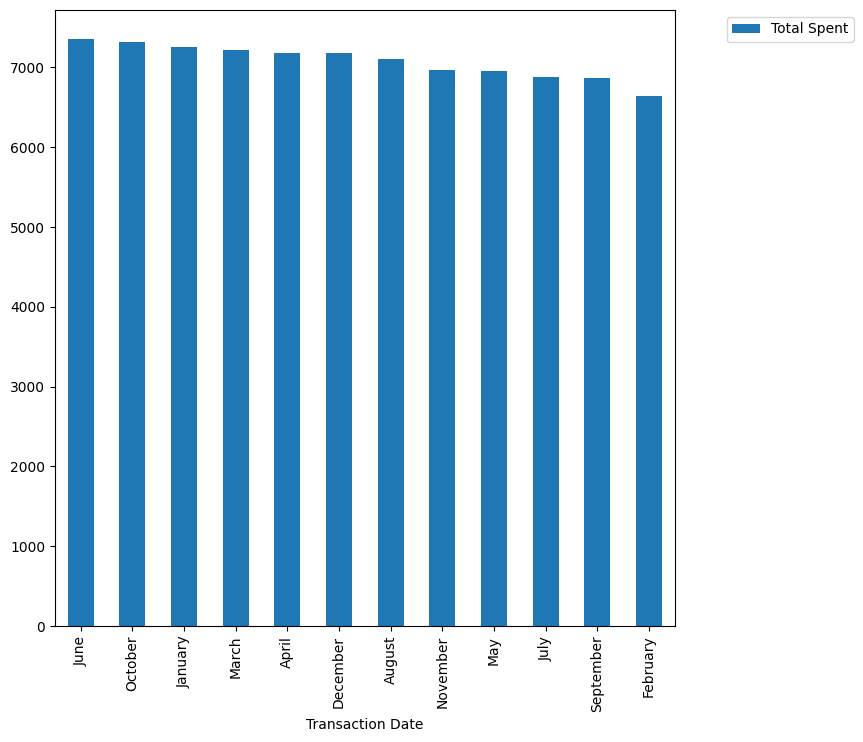

In [280]:
highest_monthly_revenue.sort_values(by="Total Spent",ascending=False).plot.bar(figsize=(8,8)).legend(bbox_to_anchor=(1.3,1))

### Month-wise Revenue Analysis
#### The bar chart above shows that the **total revenue per month is relatively consistent**, with no extreme fluctuations between most months. However, there are a few notable differences:
* **June** appears to be the **best-performing month**, showing the highest revenue among all months.
* In contrast, **February** records the **lowest revenue**, making it the weakest month in terms of performance.


### 9. How do items contribute to the highest revenue-generating month?

* #### Setting the index of the dataframe will make it easier to work with time based analysis.

In [281]:
df2=df
df2=df2.set_index("Transaction Date").sort_index()

* #### Removing `1900-01-01` because it's used as a placeholder and the actual time is not known.

In [282]:
df2=df2[df2.index!="1900-01-01"]

* #### Because the highest revenue was generated in the month `June` the dataframe can be further filtered to month `6`.

In [283]:
df2_june=df2[df2.index.month==6]

* #### A pie chart to show how each items are distributed out of `100%` in the month `June`.

C:\Users\blena\AppData\Local\Temp\ipykernel_3012\2186190675.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2_june.groupby("Item")[["Total Spent"]].sum().plot.pie(


<Axes: title={'center': "June's Total Spent per Item out of 100%"}>

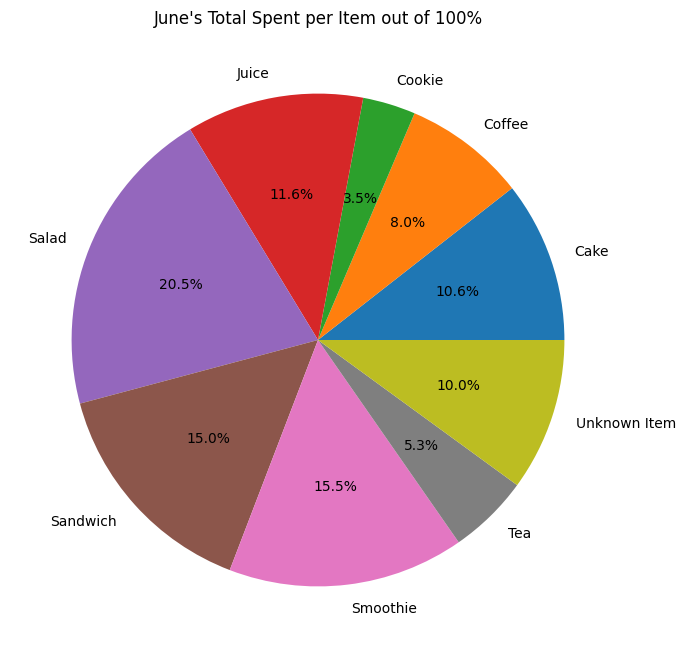

In [284]:
df2_june.groupby("Item")[["Total Spent"]].sum().plot.pie(
    y="Total Spent",
    title="June's Total Spent per Item out of 100%",
    legend=False,
    ylabel="",
    figsize=(8,8),
    autopct="%.1f%%" #To create a peercentage with 1 decimal point
    )

### Pie Chart Insights: Item Contribution in June

* The pie chart shows that `Salad` accounts for **20.5%** of the total revenue in June, further supporting previous observations that it is a top-performing item.

* On the other hand, `Cookie` contributes only **3.5%**, making it the **lowest revenue-generating item** during the month. This reinforces earlier insights that Cookie has minimal impact on overall sales.


### 10. How does revenue vary by item and payment method?

In [285]:
df.pivot_table(index="Item",columns="Location",values="Total Spent",aggfunc="sum").round(2).style.background_gradient(cmap="RdYlGn")

C:\Users\blena\AppData\Local\Temp\ipykernel_3012\2702996294.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index="Item",columns="Location",values="Total Spent",aggfunc="sum").round(2).style.background_gradient(cmap="RdYlGn")


Location,ERROR,In-store,Takeaway,UNKNOWN
Item,,,,
Cake,480.000000,2973.000000,3143.730000,3807.000000
Coffee,186.000000,1940.000000,2182.000000,2764.000000
Cookie,130.000000,972.000000,1090.000000,1040.000000
Juice,291.000000,3309.000000,2975.770000,3939.000000
Salad,575.000000,5663.900000,5070.000000,6035.000000
Sandwich,528.000000,4507.660000,4216.000000,4464.000000
Smoothie,608.000000,3812.000000,3688.000000,5236.000000
Tea,181.500000,1517.870000,1530.000000,1731.000000
Unknown Item,262.000000,2477.000000,2656.500000,3112.000000


#### Heatmap Insights: Locations vs. Items

* The heatmap reveals a **strong relationship** between most locations and the item `Salad`. This supports the earlier conclusion that **Salad generates the highest revenue** among all items.

* Additionally, the heatmap suggests that the item `Smoothie` may contain data inconsistencies or errors, as its relationship with `ERROR` is higher than the other items.

* On the other hand, the item `Cookie` shows the weakest relationship with all locations, which stands in contrast to the strong relations observed for Salad.

* These patterns highlight Salad as a key revenue driver, while also signaling areas (like Smoothie) that may require further data validation.
